#Clustering With Kmeans (Lab_3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
encoded_df = pd.get_dummies(df)

In [5]:
encoded_df

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [6]:
encoded_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_Iris-setosa', 'species_Iris-versicolor',
       'species_Iris-virginica'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaled_encoded_df = scaler.fit_transform(encoded_df)

In [10]:
scaled_encoded_df

array([[-0.90068117,  1.03205722, -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.14301691, -0.1249576 , -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.38535265,  0.33784833, -1.39813811, ...,  1.41421356,
        -0.70710678, -0.70710678],
       ...,
       [ 0.79566902, -0.1249576 ,  0.81962435, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.4321654 ,  0.80065426,  0.93335575, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.06866179, -0.1249576 ,  0.76275864, ..., -0.70710678,
        -0.70710678,  1.41421356]])

Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)

In [13]:
# Make sure to watch video to understand this line and fit() vs transform()
cluster_labels = model.fit_predict(scaled_encoded_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# IMPORTANT NOTE: YOUR 0s and 1s may be opposite of ours,
# makes sense, the number values are not significant!
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
len(scaled_encoded_df)

150

In [16]:
len(cluster_labels)

150

In [17]:
encoded_df['Cluster'] = cluster_labels

In [18]:
encoded_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Cluster
0,5.1,3.5,1.4,0.2,True,False,False,1
1,4.9,3.0,1.4,0.2,True,False,False,1
2,4.7,3.2,1.3,0.2,True,False,False,1
3,4.6,3.1,1.5,0.2,True,False,False,1
4,5.0,3.6,1.4,0.2,True,False,False,1


In [19]:
encoded_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Cluster
sepal_length,1.000000,-0.109369,0.871754,0.817954,-7.174157e-01,0.079396,0.638020,3.225221e-01
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,5.956008e-01,-0.464700,-0.130901,1.927185e-01
petal_length,0.871754,-0.420516,1.000000,0.962757,-9.226883e-01,0.201587,0.721102,2.999420e-01
petal_width,0.817954,-0.356544,0.962757,1.000000,-8.875100e-01,0.118376,0.769134,3.757153e-01
species_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000e+00,-0.500000,-0.500000,-2.711377e-16
species_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-5.000000e-01,1.000000,-0.500000,-8.660254e-01
species_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-5.000000e-01,-0.500000,1.000000,8.660254e-01
Cluster,0.322522,0.192719,0.299942,0.375715,-2.711377e-16,-0.866025,0.866025,1.000000e+00


<Axes: >

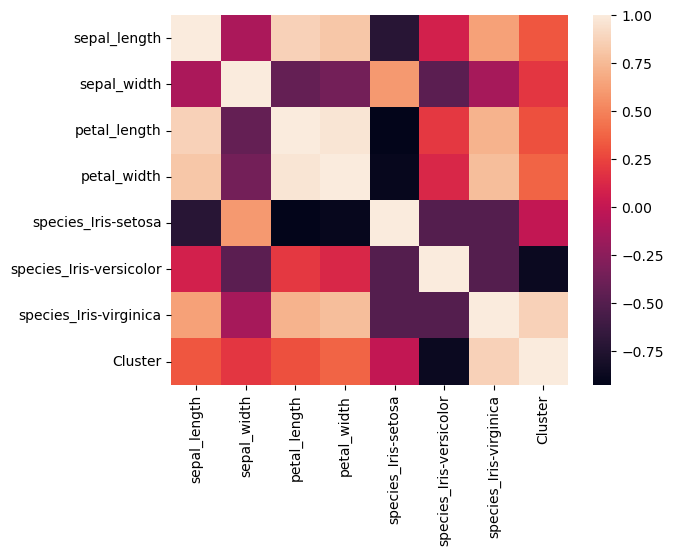

In [20]:
# plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(encoded_df.corr())

In [21]:
encoded_df.corr()['Cluster']

sepal_length               3.225221e-01
sepal_width                1.927185e-01
petal_length               2.999420e-01
petal_width                3.757153e-01
species_Iris-setosa       -2.711377e-16
species_Iris-versicolor   -8.660254e-01
species_Iris-virginica     8.660254e-01
Cluster                    1.000000e+00
Name: Cluster, dtype: float64

Choosing K Value

In [22]:
ssd = []

for k in range(2,25):

    model = KMeans(n_clusters=k)


    model.fit(scaled_encoded_df)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, ' Sum of Squared Distances')

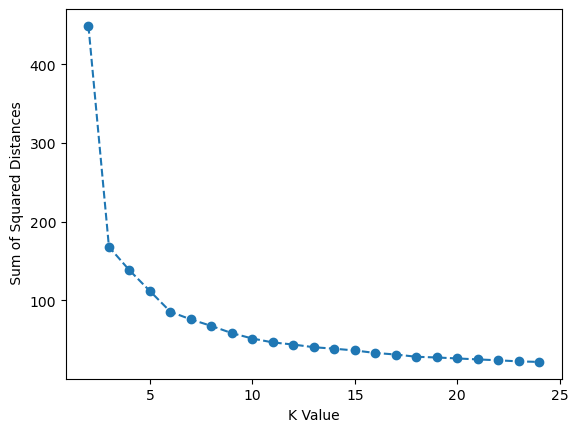

In [23]:
plt.plot(range(2,25),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Analyzing SSE Reduction

In [24]:
ssd

[448.73200573676354,
 167.8887870785651,
 138.1359469083676,
 111.70436663726201,
 85.39891568033303,
 75.65304353475469,
 67.38946664002223,
 58.20866909919661,
 51.37394826227455,
 46.414799877300766,
 43.71708447502485,
 40.32489078323432,
 38.41841512419474,
 36.19219407027851,
 33.018663302213575,
 31.057448796293542,
 28.186028105581315,
 27.279626150138423,
 26.059455076031714,
 24.833952163118987,
 23.69587705157769,
 22.31300862205543,
 21.6440290029551]

In [25]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0            NaN
1    -280.843219
2     -29.752840
3     -26.431580
4     -26.305451
5      -9.745872
6      -8.263577
7      -9.180798
8      -6.834721
9      -4.959148
10     -2.697715
11     -3.392194
12     -1.906476
13     -2.226221
14     -3.173531
15     -1.961215
16     -2.871421
17     -0.906402
18     -1.220171
19     -1.225503
20     -1.138075
21     -1.382868
22     -0.668980
dtype: float64

<Axes: >

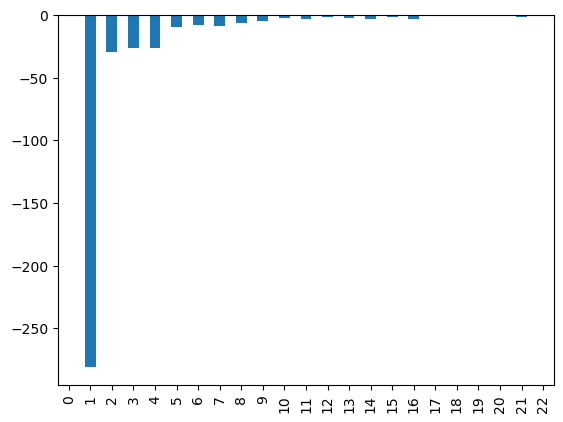

In [26]:
pd.Series(ssd).diff().plot(kind='bar')

Silhouette Score (Lab 4_1)

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
best_model = KMeans(n_clusters = 3)
best_model.fit(scaled_encoded_df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
Kmeans_euc_sil = silhouette_score(scaled_encoded_df, best_model.predict(scaled_encoded_df))
print(Kmeans_euc_sil)

0.6563176642560047


##Using Manhattan Distance

In [30]:
from sklearn.metrics.pairwise import pairwise_distances
# Define the custom distance function (Manhattan distance)
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Use pairwise_distances to create a distance matrix based on the Manhattan distance
distance_matrix = pairwise_distances(scaled_encoded_df, metric=manhattan_distance)

In [31]:
ssd = []

for k in range(2,25):

    model = KMeans(n_clusters=k)


    model.fit(distance_matrix)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, ' Sum of Squared Distances')

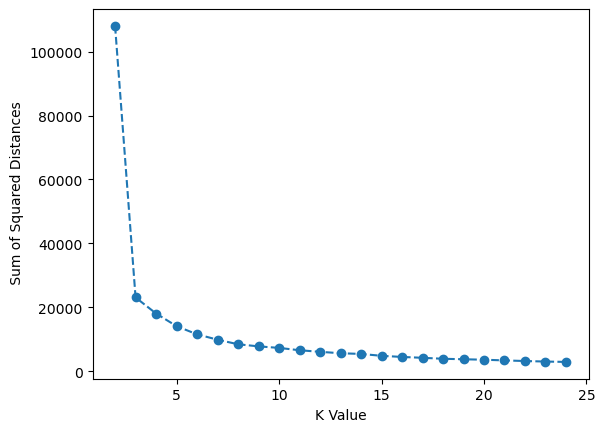

In [32]:
plt.plot(range(2,25),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

Analyzing SSE Reduction

In [33]:
ssd

[108072.8658491296,
 23070.355167096168,
 18044.146022376364,
 14085.58207059791,
 11529.155831817738,
 9848.228725752579,
 8417.109053902757,
 7761.848789496433,
 7279.825833219246,
 6548.883849761671,
 6053.765822978087,
 5610.337661214406,
 5389.594840114154,
 4804.569076011998,
 4449.853250826271,
 4181.7183410390735,
 3877.6358170400863,
 3726.8692929326303,
 3577.436632729129,
 3365.733620152355,
 3171.01656394171,
 3007.9819597100673,
 2890.7176000191103]

In [34]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0              NaN
1    -85002.510682
2     -5026.209145
3     -3958.563952
4     -2556.426239
5     -1680.927106
6     -1431.119672
7      -655.260264
8      -482.022956
9      -730.941983
10     -495.118027
11     -443.428162
12     -220.742821
13     -585.025764
14     -354.715825
15     -268.134910
16     -304.082524
17     -150.766524
18     -149.432660
19     -211.703013
20     -194.717056
21     -163.034604
22     -117.264360
dtype: float64

<Axes: >

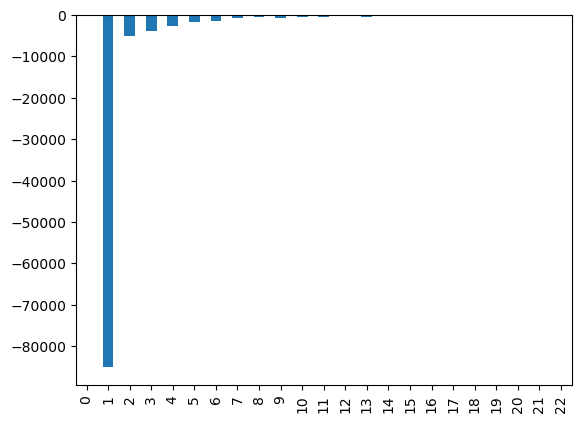

In [35]:
pd.Series(ssd).diff().plot(kind='bar')

Silhouette Score (Lab 4_1)

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
best_model = KMeans(n_clusters = 3)
best_model.fit(distance_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [38]:
kmeans_man_sil = silhouette_score(distance_matrix, best_model.predict(distance_matrix))
print(kmeans_man_sil)

0.7650281849829264


# Agglomerative Clustering (Lab4_2)

In [39]:
import numpy as np
import pandas as pd

## The Data

In [40]:
df = pd.read_csv("IRIS.csv")

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
# encoded_df = pd.get_dummies(df)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['species'] = label_encoder.fit_transform(df['species'])

In [43]:
df = pd.get_dummies(df)

In [44]:
df

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


## Using Scikit-Learn

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
from sklearn.metrics import silhouette_score

silhouette_score(df, cluster_labels)

0.6216114869616788

In [47]:
num_cluster= np.arange(2,20)
scores=[]
for k in num_cluster:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(df)
    scores.append(silhouette_score(df, cluster_labels))

print(scores)

[0.6653278281384337, 0.6216114869616788, 0.5865433818395723, 0.5378313607905743, 0.5228607794403402, 0.3930829385534079, 0.3843492022385851, 0.3571563349390843, 0.34007844951543803, 0.3224780351367496, 0.31344022157056517, 0.31062921334753707, 0.31849710139390525, 0.29804407487567364, 0.30323309966329953, 0.28517665715050133, 0.2778305584572423, 0.28370067343370275]


In [48]:
agglom_sil = scores[0]

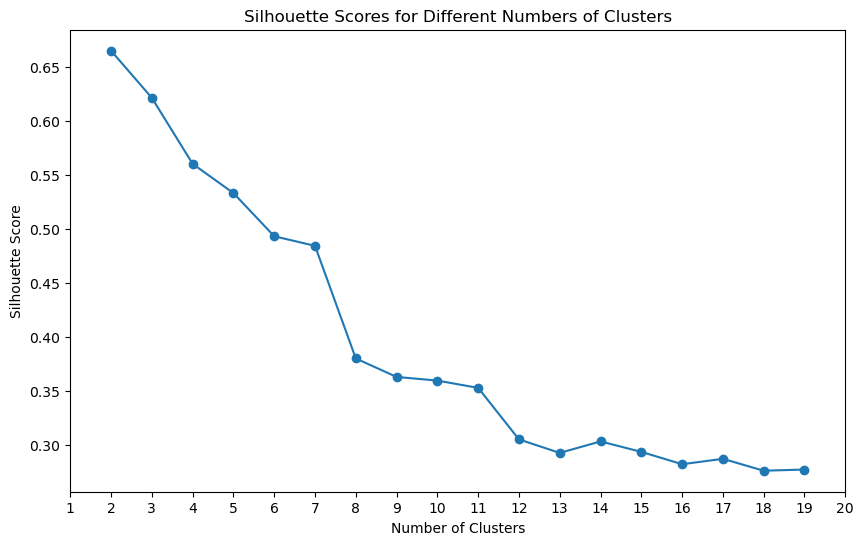

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

num_clusters = np.arange(2, 20)
silhouette_scores = []

for k in num_clusters:
    model = AgglomerativeClustering(n_clusters=k, metric='manhattan', linkage='average')
    cluster_labels = model.fit_predict(df)
    silhouette_sc = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_sc)

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(1, 21, 1))
plt.show()


In [50]:
# Print the score using Eucliean distance and save it
print(silhouette_scores)
agglom_sil_Euc = silhouette_scores[0]


[0.6653278281384337, 0.6216114869616788, 0.560442857280001, 0.5333584641820946, 0.49332803548447524, 0.48445597347953584, 0.38003799177116626, 0.3629311673478169, 0.3595182515044182, 0.35278837924874495, 0.3050208137392006, 0.2925025528384225, 0.30313220159076776, 0.2934487689796484, 0.2820112591231966, 0.2869959888944131, 0.27597675741217653, 0.27707241381907477]


In [51]:
# Print the score using Manhattan distance and save it
print(silhouette_scores)
agglom_sil_Man = silhouette_scores[0]


[0.6653278281384337, 0.6216114869616788, 0.560442857280001, 0.5333584641820946, 0.49332803548447524, 0.48445597347953584, 0.38003799177116626, 0.3629311673478169, 0.3595182515044182, 0.35278837924874495, 0.3050208137392006, 0.2925025528384225, 0.30313220159076776, 0.2934487689796484, 0.2820112591231966, 0.2869959888944131, 0.27597675741217653, 0.27707241381907477]


# DBSCAN Clustering (Lab4_3)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv("IRIS.csv")

In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
# encoded_df = pd.get_dummies(df)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['species'].unique()

array([0, 1, 2])

## DBSCAN



**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [56]:
#CODE HERE

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
dbscan = DBSCAN(eps=0.5)
cluster_labels = dbscan.fit_predict(df)

In [59]:
cluster_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  2,  2,
        2,  2,  2, -1, -1,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1,
       -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [60]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(df)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

    outlier_percent.append(perc_outliers)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0.5, 0, 'Epsilon Value')

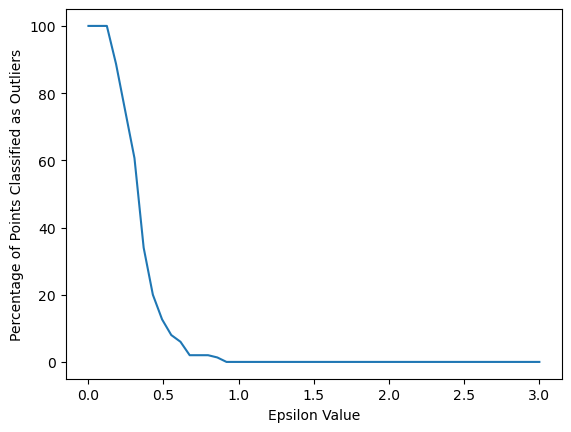

In [61]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

In [62]:
# With Minimum points
import numpy as np
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001, 3, 50):
    for min_samples in range(1, 11):  # Adjust the range based on your preference
        # Create Model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df)

        # Log percentage of points that are outliers
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

        outlier_percent.append({'eps': eps, 'min_samples': min_samples, 'outlier_percent': perc_outliers})


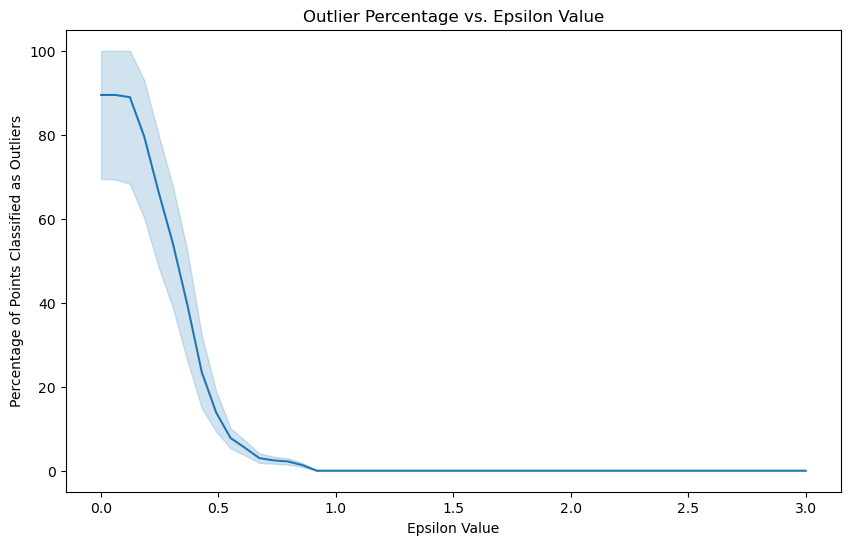

In [63]:
# Convert the result to a DataFrame
outlier_df = pd.DataFrame(outlier_percent)

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='eps', y='outlier_percent', data=outlier_df)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.title("Outlier Percentage vs. Epsilon Value")
plt.show()

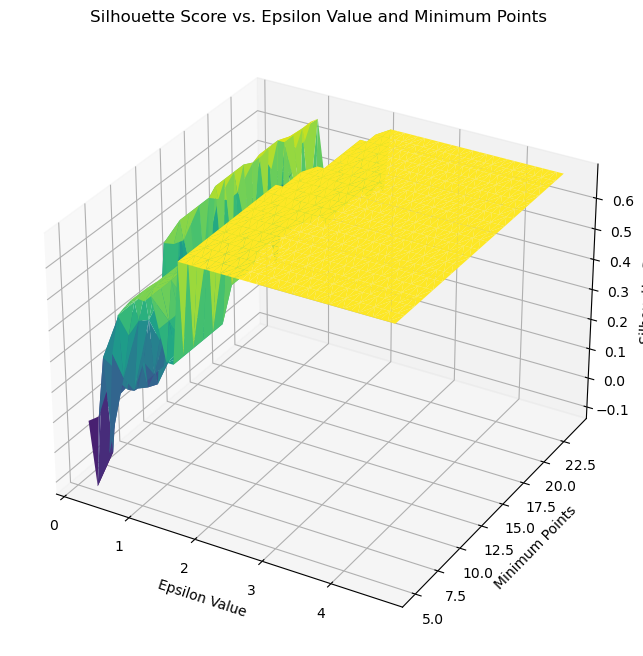

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

outlier_percent = []

for eps in np.linspace(0.001, 5, 50):
    for min_samples in range(5, 25):  # Adjust the range based on your preference
        # Create Model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='manhattan')
        cluster_labels = dbscan.fit_predict(df)

        unique_labels = np.unique(cluster_labels)

        # Check if there are at least two unique labels for silhouette score
        if len(unique_labels) < 2:
            continue

        DBSCAN_sli = silhouette_score(df, cluster_labels)

        # Log percentage of points that are outliers
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

        outlier_percent.append({'eps': eps, 'min_samples': min_samples, 'outlier_percent': perc_outliers, 'sli_score': DBSCAN_sli})

# Convert the result to a DataFrame
outlier_df = pd.DataFrame(outlier_percent)

# Create a 3D line plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the line plot
ax.plot_trisurf(outlier_df['eps'], outlier_df['min_samples'], outlier_df['sli_score'], cmap='viridis')

# Set plot labels and title
ax.set_xlabel("Epsilon Value")
ax.set_ylabel("Minimum Points")
ax.set_zlabel("Silhouette Score")
ax.set_title("Silhouette Score vs. Epsilon Value and Minimum Points")

plt.show()


In [65]:
#CODE HERE

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value.

In [66]:
# Using Euclidean distance
sorted_data = sorted(outlier_percent, key=lambda x: x["sli_score"], reverse=True)
sorted_data[0]

{'eps': 1.123224489795918,
 'min_samples': 5,
 'outlier_percent': 0.0,
 'sli_score': 0.6822257796144714}

In [80]:
# Using Manhattan distance
sorted_data = sorted(outlier_percent, key=lambda x: x["sli_score"], reverse=True)
sorted_data[0]

{'eps': 1.6333265306122446,
 'min_samples': 5,
 'outlier_percent': 0.0,
 'sli_score': 0.69293811896957}

In [68]:
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=1.12, min_samples=5, metric='euclidean')

cluster_labels = dbscan.fit_predict(df)
DBSCAN_sli_Euc = silhouette_score(df, cluster_labels)
DBSCAN_sli_Euc


0.6822257796144714

In [82]:
dbscan = DBSCAN(eps=1.63, min_samples=5, metric='manhattan')
cluster_labels = dbscan.fit_predict(df)
cluster_labels
DBSCAN_sli_Man = silhouette_score(df, cluster_labels)
DBSCAN_sli_Man

0.69293811896957

#Comparing & Plotting

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

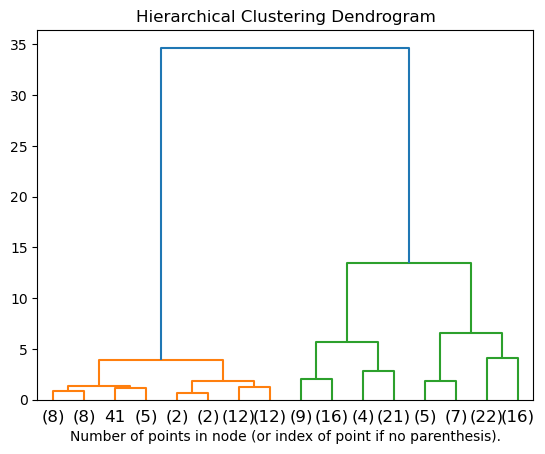

In [71]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
# from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# X = iris.data
# df = pd.read_csv("IRIS.csv")
# df = pd.get_dummies(df)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [72]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


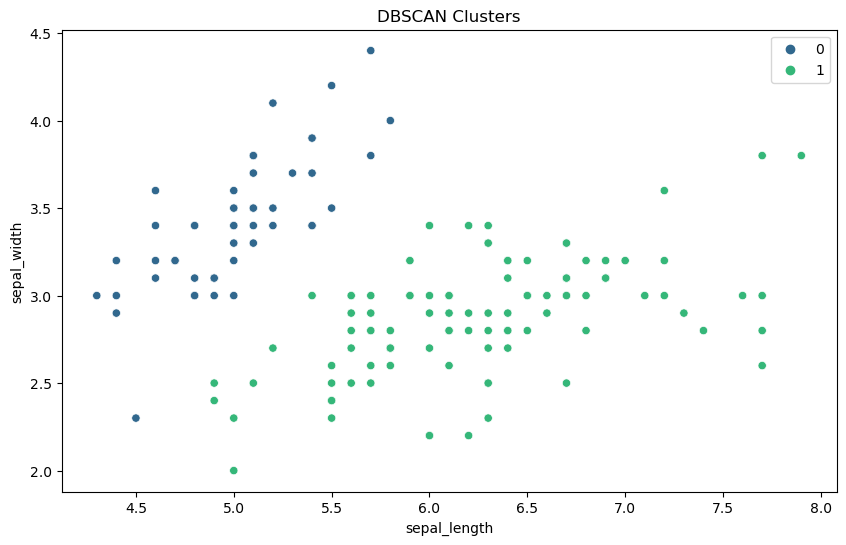

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming df is your DataFrame

outlier_percent = []

for eps in np.linspace(0.001, 5, 50):
    for min_samples in range(5, 25):  # Adjust the range based on your preference
        # Create Model
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df)

        unique_labels = np.unique(cluster_labels)

        # Check if there are at least two unique labels for silhouette score
        if len(unique_labels) < 2:
            continue

        DBSCAN_sli = silhouette_score(df, cluster_labels)

        # Log percentage of points that are outliers
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)

        outlier_percent.append({'eps': eps, 'min_samples': min_samples, 'outlier_percent': perc_outliers, 'sli_score': DBSCAN_sli})

# Convert the result to a DataFrame
outlier_df = pd.DataFrame(outlier_percent)

# Get the parameters with the highest silhouette score
best_params = sorted(outlier_percent, key=lambda x: x["sli_score"], reverse=True)[0]

# Create a DBSCAN model with the best parameters
dbscan = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
cluster_labels = dbscan.fit_predict(df)

df['cluster_labels'] = pd.DataFrame(cluster_labels)
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=cluster_labels, palette='viridis', legend='full')
plt.title("DBSCAN Clusters")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()


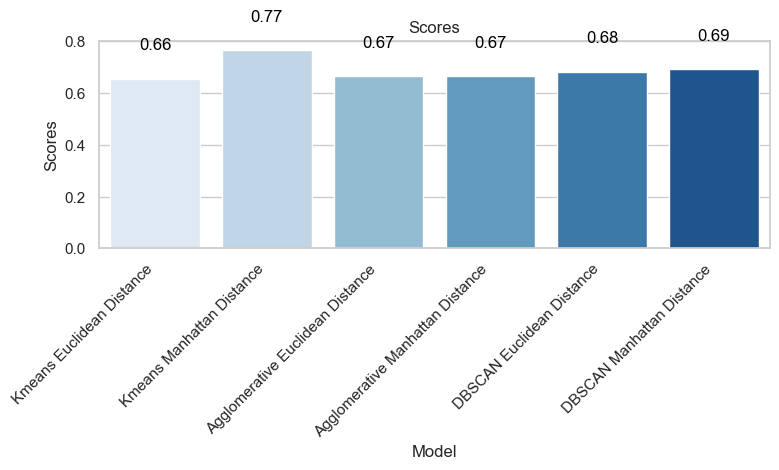

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
scores = [Kmeans_euc_sil, kmeans_man_sil, agglom_sil_Euc, agglom_sil_Man, DBSCAN_sli_Euc, DBSCAN_sli_Man]
names = ['Kmeans Euclidean Distance', 'Kmeans Manhattan Distance', 'Agglomerative Euclidean Distance', 'Agglomerative Manhattan Distance', 'DBSCAN Euclidean Distance', 'DBSCAN Manhattan Distance']

# Creating a DataFrame for easy plotting
data = pd.DataFrame({'Scores': scores, 'Names': names})

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Names', y='Scores', data=data, palette='Blues')

# Annotate each bar with its value
for i, v in enumerate(scores):
    ax.text(i, v + 0.1, f'{v:.2f}', color='black', ha='center', va='bottom')

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores')

# Rotate x-axis labels by 45 degrees for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [77]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)